### Stochastic growth model

$ V(k,A) = max \; \frac{c^{1-\sigma} - 1}{1-\sigma} + \beta V(k',A')$

$s.t.$

$k' = A k^{\alpha} - c + (1-\delta)k$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from value_function_iteration import *

# parameters
alpha=0.33
beta=0.95
sigma = 2
delta = 0.1
mu=0
s=0.1

# states for productivity
A_dist = np.array([0.9, 1, 1.1])
P = np.array([[2/3, 1/6, 1/6], [1/6, 2/3, 1/6], [1/6, 1/6, 2/3]])

# tolerance
tolerance = 0.01

# capital steady state
kss = (alpha/((1/beta)-(1-delta)))**(1/(1-alpha))

# grid
grid_min = 0.25*kss
grid_max = 1.75*kss
grid_size = 100         
grid = np.linspace(grid_min, grid_max, grid_size)

# initial guess
v0 = np.zeros([grid.shape[0],A_dist.shape[0]])

# bellman equation
def bellman(kp, k, v_fn, alpha, beta, sigma, delta, A, Pj):
    c=A*k**alpha + (1-delta)*k - kp
    a1=1-sigma
    a2=beta*np.dot(v_fn(kp), Pj.T)
    
    if c<=0:
        val = -1e10-1e3*abs(c)
    else:
        val = (1/a1)*(c**a1-1) + a2
    
    return -val
              
    
policy, v = value_function_iteration(grid, tolerance, v0, alpha, beta, sigma, delta, bellman, grid_min, grid_max, A_dist, P)

Convergence after 54 iterations and 23.32 seconds


### Charts
The intersection of the policy function with the 45 degree line gives us the steady state for capital
The steady state is at approximately 3.16 as computed before

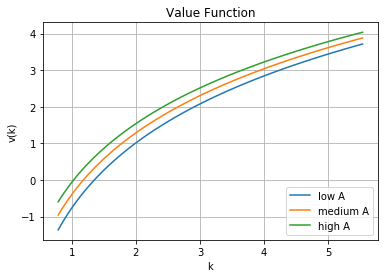

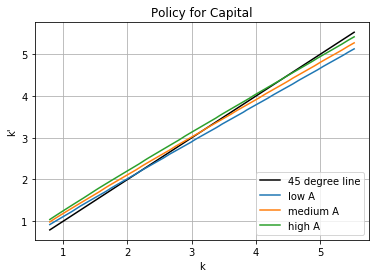

In [4]:
# Value function
fig, ax = plt.subplots()
ax.plot(grid, v[:,0], label='low A')
ax.plot(grid, v[:,1], label='medium A')
ax.plot(grid, v[:,2], label='high A')
ax.legend(loc='lower right')
ax.set_xlabel('k')
ax.set_ylabel('v(k)')
plt.title('Value Function')
plt.grid(True)
plt.show()

# Capital
fig, ax = plt.subplots()
ax.plot(grid, grid, color='k', label='45 degree line')
ax.plot(grid, policy[:,0], label = 'low A')
ax.plot(grid, policy[:,1], label='medium A')
ax.plot(grid, policy[:,2], label='high A')
ax.legend(loc='lower right')
ax.set_xlabel('k')
ax.set_ylabel("k'")
plt.title('Policy for Capital')
plt.grid(True)
plt.show()


### Consumption

The policy function for consumption is given by

$ \sigma_c(k)= k^{\alpha} + (1-\delta) k - \sigma_{k'}(k)$

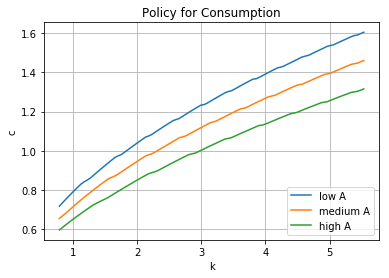

In [5]:
# Consumption
cons_low=grid**alpha + (1-delta)*grid - policy[:,0]
cons_medium=grid**alpha + (1-delta)*grid - policy[:,1]
cons_high=grid**alpha + (1-delta)*grid - policy[:,2]

fig, ax = plt.subplots()
ax.plot(grid, cons_low, label='low A')
ax.plot(grid, cons_medium, label='medium A')
ax.plot(grid, cons_high, label='high A')
ax.legend(loc='lower right')
ax.set_xlabel('k')
ax.set_ylabel("c")
plt.title('Policy for Consumption')
plt.grid(True)
plt.show()

### Net Investment
Net Investment is positive when we are below the steady state for capital and negative when we are above the steady state



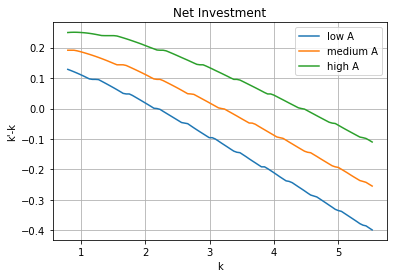

In [6]:
# New Investment
inv_low=policy[:,0]-grid
inv_medium=policy[:,1]-grid
inv_high=policy[:,2]-grid

fig, ax = plt.subplots()
ax.plot(grid, inv_low, label='low A')
ax.plot(grid, inv_medium, label='medium A')
ax.plot(grid, inv_high, label='high A')
ax.legend(loc='upper right')
ax.set_xlabel('k')
ax.set_ylabel("k'-k")
plt.title('Net Investment')
plt.grid(True)
plt.show()